# VGG16 in Keras

VGG16 is a convolution neural net (CNN) architecture which was used to win ILSVR(Imagenet) competition in 2014. It is considered to be one of the excellent vision model architecture till date. 

The most unique thing about VGG16 is that instead of having a large number of hyper-parameter they focused on having convolution layers of 3x3 filter with a stride 1 and always used same padding and maxpool layer of 2x2 filter of stride 2. It follows this arrangement of convolution and max pool layers consistently throughout the whole architecture. In the end it has 2 FC (fully connected layers) followed by a softmax for output. 

The 16 in VGG16 refers to it has 16 layers that have weights. This network is a pretty large network and it has about 138 million (approx) parameters.

## Data Setup

We are going to implement full VGG16 using Keras. This implementation will be done on Dogs vs Cats dataset taken from Kaggle. 

Firstly, we will download the dataset -

In [2]:
# getting the data
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O cats_and_dogs_filtered.zip

--2020-11-04 17:02:13--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.240, 172.217.15.112, 172.217.2.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  79.1MB/s    in 0.8s    

2020-11-04 17:02:14 (79.1 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
! unzip cats_and_dogs_filtered.zip

Then we shall import all the libraries which we will need to implement VGG16. We will be creating a sequential model. As the name suggests, all the layers of the model will be arranged in sequence.

The objective of ImageDataGenerator is to import data with labels easily into the model. It is a very useful class as it has many functions useful for pre-processing. It doesn’t affect the data stored on the disk and alters the data on the go while passing it to the model.

In [4]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

Here we are creating ImageDataGenerator objects for both training and test data and passing the folder which has train data to the object trdata and the folder which has test data to the object tsdata. It will automatically label the cat and dog images with the appropriate labels.

In [5]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="cats_and_dogs_filtered/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="cats_and_dogs_filtered/validation", target_size=(224,224))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## VGG16 using Keras

After this, we will construct the VGG16 model using Keras. The layers we need to define are as follows - 

* 2 x convolution layer of 64 channel of 3x3 kernal and same padding
* 1 x maxpool layer of 2x2 pool size and stride 2x2
* 2 x convolution layer of 128 channel of 3x3 kernal and same padding
* 1 x maxpool layer of 2x2 pool size and stride 2x2
* 3 x convolution layer of 256 channel of 3x3 kernal and same padding
* 1 x maxpool layer of 2x2 pool size and stride 2x2
* 3 x convolution layer of 512 channel of 3x3 kernal and same padding
* 1 x maxpool layer of 2x2 pool size and stride 2x2
* 3 x convolution layer of 512 channel of 3x3 kernal and same padding
* 1 x maxpool layer of 2x2 pool size and stride 2x2

The `relu` (Rectified Linear Unit) activation is passed to each layer so that all the negative values are not passed to the next layer.

After creating all the convolution layers we pass the data to the dense layer so for that we flatten the vector which comes out of the convolutions and add the following layers -
* 1 x Dense layer of 4096 units
* 1 x Dense layer of 4096 units
* 1 x Dense Softmax layer of 2 units

We use ReLU activation for both dense layers consisting of 4096 units to avoid passing negative values. We use a 2 unit dense layer in the end with `softmax` activation as we have 2 classes to predict from in the end: dog and cat. The softmax layer will output the value between 0 and 1 based on the prediction made by the model.

In [6]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

The Adam optimizer is used to reach to the global minima while training out model. We will also set the learning rate of the optimizer at 0.001. Then, we compile the model and print a summary of the layers for verification of the structure.

In [7]:
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

## Training the Model

After the creation of the model we will import ModelCheckpoint and EarlyStopping method from keras.

`ModelCheckpoint` helps us by monitoring a specific parameter of the model. In this case we are monitoring validation accuracy by passing `val_accuracy` to `ModelCheckpoint`. The model will only be saved to disk if the validation accuracy of the model in current epoch is greater than what it was in the last epoch.

`EarlyStopping` helps us to stop the training of the model early if there is no increase in the parameter which we are monitoring. In this case we are monitoring validation accuracy by passing `val_accuracy` to `EarlyStopping`. We have set the argument `patience` to 20 which means that the model will stop training if it doesn’t see any rise in validation accuracy in 20 epochs.

Bearing in mind the time constraints, we have chosen to train for only 5 epochs but the normal value is around 100 epochs.

In [9]:
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor = 'val_accuracy', verbose = 2, save_best_only = True, save_weights_only = False, mode = 'auto', save_freq = 'epoch')
early = EarlyStopping(monitor = 'val_accuracy', min_delta = 0, patience = 20, verbose = 2, mode = 'auto')

After executing the above line the model will start to train and we will start to see the training/validation accuracy and loss -

In [11]:
hist = model.fit(traindata, steps_per_epoch = 50, validation_data = testdata, validation_steps = 10, epochs = 5, callbacks = [checkpoint, early])

Epoch 1/5
50/50 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5082
Epoch 00001: val_accuracy did not improve from 0.51250
50/50 [==============================] - 22s 449ms/step - loss: 0.6932 - accuracy: 0.5082 - val_loss: 0.6939 - val_accuracy: 0.4906
Epoch 2/5
50/50 [==============================] - ETA: 0s - loss: 0.6938 - accuracy: 0.5000
Epoch 00002: val_accuracy improved from 0.51250 to 0.52188, saving model to vgg16_1.h5
50/50 [==============================] - 30s 594ms/step - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.6926 - val_accuracy: 0.5219
Epoch 3/5
50/50 [==============================] - ETA: 0s - loss: 0.6955 - accuracy: 0.4981
Epoch 00003: val_accuracy did not improve from 0.52188
50/50 [==============================] - 22s 434ms/step - loss: 0.6955 - accuracy: 0.4981 - val_loss: 0.6936 - val_accuracy: 0.4844
Epoch 4/5
50/50 [==============================] - ETA: 0s - loss: 0.6934 - accuracy: 0.4912
Epoch 00004: val_accuracy improved 

Once we have trained the model we can visualise training/validation accuracy. We pass the output of `model.fit()` to `hist` variable and use it to plot the validation accuracy.

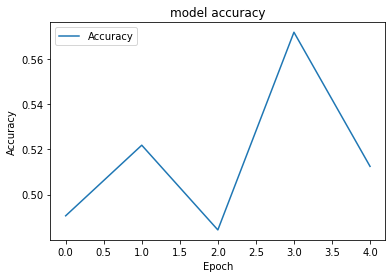

In [15]:
# plt.plot(hist.history["acc"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

## Testing

To do predictions on the trained model we need to load the best saved model and pre-process the test image and pass the image to the model for output -

dog


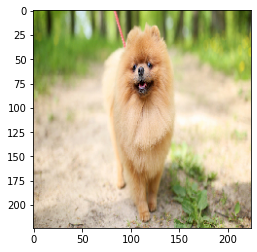

In [17]:
# Loading the image
img = image.load_img("Pomeranian_01.jpeg",target_size=(224,224))
img = np.asarray(img)
# Displaying the image
plt.imshow(img)
img = np.expand_dims(img, axis=0)
# Load the model
saved_model = load_model("vgg16_1.h5")
# Prediction
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')

Thus we can realize the VGG16 model using Keras.

# References

1. [Blog Post: Step by step VGG16 implementation in Keras for beginners by Rohit Thakur](https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c)